# Introduction to Sequential Parameter Optimization
## spot as an Optimizer

The `spot` loop consists of the following steps:

1. Init: Build initial design $X$
2. Evaluate initial design on real objective $f$: $y = f(X)$
3. Build surrogate: $S = S(X,y)$
4. Optimize on surrogate: $X_0 =  \text{optimize}(S)$
5. Evaluate on real objective: $y_0 = f(X_0)$
6. Impute (Infill) new points: $X = X \cup X_0$, $y = y \cup y_0$.
7. Got 3.

* Central Idea:
  * Evaluation of the surrogate model `S` is much cheaper (or / and much faster) than running the real-world experiment $f$.

We start with a small example.

## 1 Example: `Spot` and the Sphere Function

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### The Objective Function: Sphere

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x) = x^2$$

In [2]:
fun = analytical().fun_sphere

* We can apply the function `fun` to input values and plot the result:

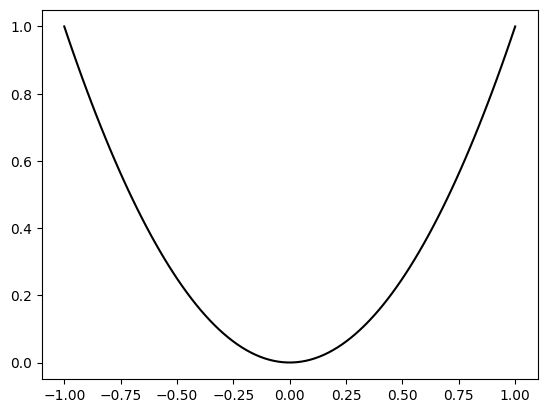

In [3]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x, y, "k")
plt.show()

In [4]:
spot_0 = spot.Spot(fun=fun,
                   lower = np.array([-1]),
                   upper = np.array([1]))


In [5]:
spot_0.run()

In [6]:
spot_0.print_results()

min y: 4.897545259852824e-10
x0: 2.2130398233770724e-05


[['x0', 2.2130398233770724e-05]]

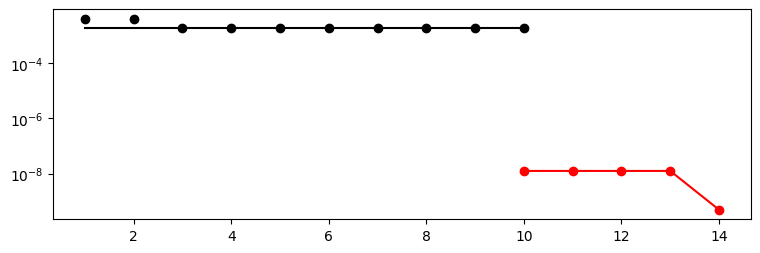

In [7]:
spot_0.plot_progress(log_y=True)

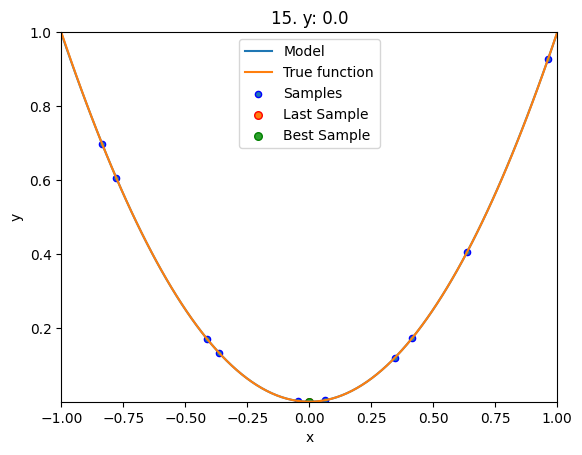

In [8]:
spot_0.plot_model()

## `Spot` Parameters: `fun_evals`, `init_size` and `show_models`

* We will modify three parameters:
    1. The number of function evaluations (`fun_evals`)
    2. The size of the initial design (`init_size`)
    3. The parameter `show_models`, which visualizes the search process for 1-dim functions.
* The full list of the `Spot` parameters is shown in the Help System and in the notebook `spot_doc.ipynb`.

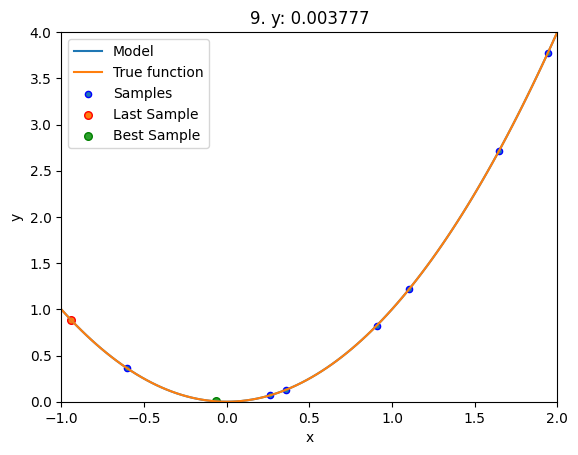

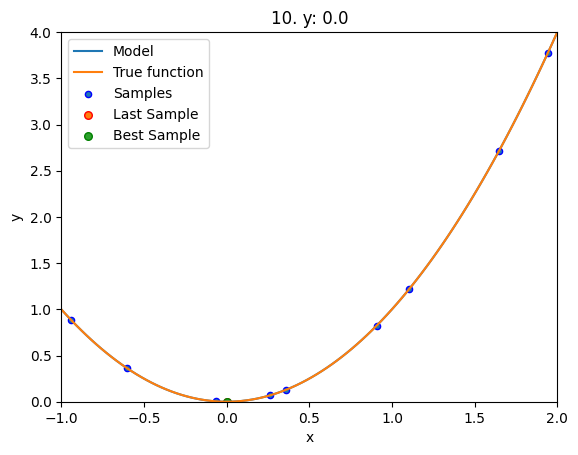

In [9]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-1]),
                   upper = np.array([2]),
                   fun_evals= 10,
                   seed=123,
                   show_models=True,
                   design_control={"init_size": 9})
spot_1.run()

## Print the Results

In [10]:
spot_1.print_results()

min y: 3.648984784366253e-07
x0: -0.0006040682729929005


[['x0', -0.0006040682729929005]]

## Show the Progress

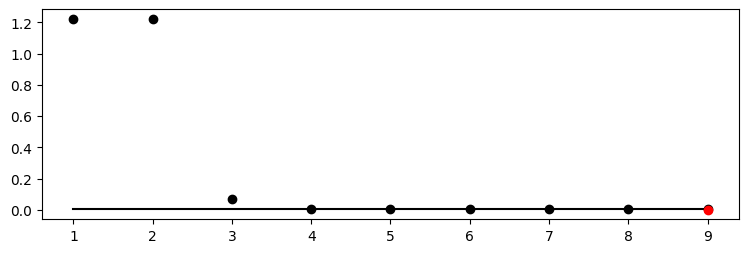

In [11]:
spot_1.plot_progress()

# Further Topics

1. Parameters: [spot_doc.ipynb](spot_doc.ipynb) 
2. Multidimensional Functions: [spot_multidim.ipynb](./spot_multidim.ipynb)
3. Noise: [spot_noisy.ipynb](./spot_noisy.ipynb)
4. Non-isotropic Models [spot_nonisotropic.ipynb](./spot_nonisotropic.ipynb)
5. Sklearn Models [spot_sklearn.iypnb](./spot_sklearn.ipynb)
6. Expected Improvement [spot_ei.ipynb](./spot_ei.ipynb)
7. Gaussian Processed [spot_gaussian.ipynb](./spot_gaussian.ipynb)
8. Optimizers: Comparison with other optimizers
9. Factors
10. Numerical issues, definiteness, inverse